# OTT REVENUE PREDICTION MODEL

A model to predict the revenue in million dollars based on the number of scubscribers. 

Data set:

Independant variable X: Subscribers/Year/Content Spend/Profit  
Dependant variable Y: Overall revenue generated in dollars

In [1]:
#import required libraries
import numpy as np 
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#List all files used
for dirname, _, filenames in os.walk(r"C:\Users\vdp10002\Desktop\MainProject_OTTRevenuePredictionModel"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\vdp10002\Desktop\MainProject_OTTRevenuePredictionModel\Netflix\ContentSpend.csv
C:\Users\vdp10002\Desktop\MainProject_OTTRevenuePredictionModel\Netflix\NumSubscribers.csv
C:\Users\vdp10002\Desktop\MainProject_OTTRevenuePredictionModel\Netflix\NumSubscribersByRegion.csv
C:\Users\vdp10002\Desktop\MainProject_OTTRevenuePredictionModel\Netflix\Profit.csv
C:\Users\vdp10002\Desktop\MainProject_OTTRevenuePredictionModel\Netflix\Revenue.csv
C:\Users\vdp10002\Desktop\MainProject_OTTRevenuePredictionModel\Netflix\RevenueByRegion.csv


In [3]:
#import datset
df_profit = pd.read_csv(r"C:\Users\vdp10002\OneDrive - Advanced Micro Devices Inc\IISC_project\MainProject_OTTRevenuePredictionModel\Netflix\Profit.csv")
df_subscribers = pd.read_csv(r"C:\Users\vdp10002\Desktop\MainProject_OTTRevenuePredictionModel\Netflix\NumSubscribers.csv")
df_revenue = pd.read_csv(r"C:\Users\vdp10002\Desktop\MainProject_OTTRevenuePredictionModel\Netflix\Revenue.csv")
df_ContentSpend=pd.read_csv(r"C:\Users\vdp10002\Desktop\MainProject_OTTRevenuePredictionModel\Netflix\ContentSpend.csv")
#initial exploration of data
df_profit

,Year,Profit
0,2012,0.050
1,2013,0.228
2,2014,0.403
3,2015,0.306
4,2016,0.379
5,2017,0.839
6,2018,1.600
7,2019,2.600
8,2020,4.500


In [4]:
df_subscribers

,Year,Subscribers
0,2011,21.5
1,2012,25.7
2,2013,35.6
3,2014,47.9
4,2015,62.7
5,2016,79.9
6,2017,99.0
7,2018,124.3
8,2019,151.5
9,2020,192.9


In [5]:
df_revenue

,Year,Revenue
0,2011,3.1
1,2012,3.5
2,2013,4.3
3,2014,5.4
4,2015,6.7
5,2016,8.8
6,2017,11.6
7,2018,15.7
8,2019,20.1
9,2020,24.9


In [6]:
df_ContentSpend

,Year,Content_spend
0,2016,6.88
1,2017,8.91
2,2018,12.00
3,2019,13.90
4,2020,11.80
5,2021,17.00


# VISUALIZE DATSET

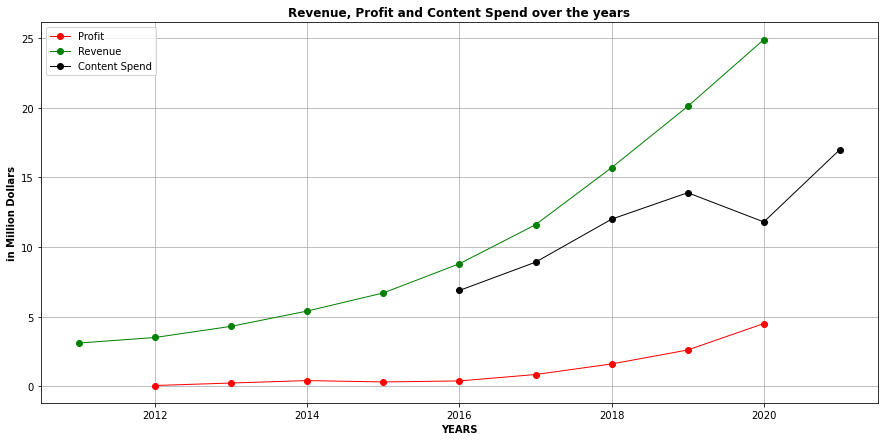

In [7]:
#understanding the trend of Revenue over the years, profit and content spend
x1 = df_profit['Year'].values
y1 = df_profit['Profit'].values

x2=df_subscribers['Year'].values
y2=df_subscribers['Subscribers'].values

x3=df_revenue['Year'].values
y3=df_revenue['Revenue'].values

x4=df_ContentSpend['Year'].values
y4=df_ContentSpend['Content_spend'].values

plt.rcParams["figure.figsize"] = (15,7)

plt.plot(x1, y1, 'red', label='Profit',  marker='o', linestyle='-', linewidth='1')
#plt.plot(x2, y2, 'blue', label='Subscribers')
plt.plot(x3, y3, 'green', label='Revenue',  marker='o', linestyle='-', linewidth='1')
plt.plot(x4, y4, 'black', label='Content Spend',  marker='o', linestyle='-', linewidth='1')

plt.grid()
plt.xlabel('YEARS', fontweight="bold")
plt.ylabel('in Million Dollars', fontweight="bold")
plt.title('Revenue, Profit and Content Spend over the years', fontweight="bold")
plt.legend()
plt.show()

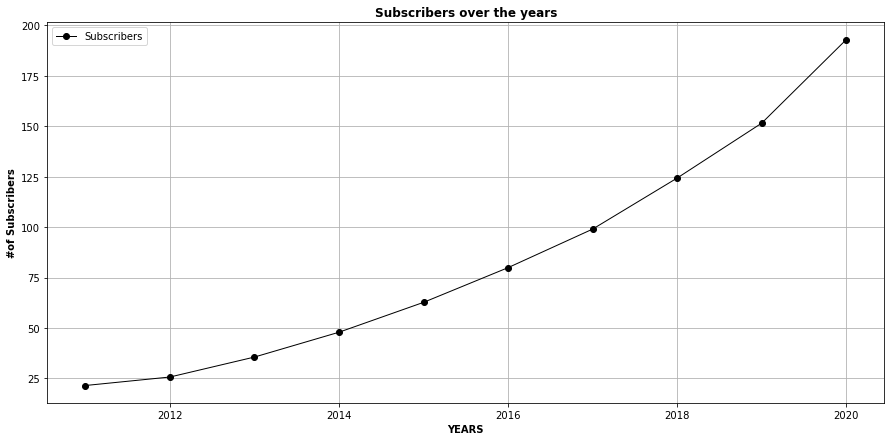

In [8]:
#understanding the trend of Revenue wrt # of Subscribers
x5=df_subscribers['Year'].values
y5=df_subscribers['Subscribers'].values

plt.rcParams["figure.figsize"] = (15,7)

plt.plot(x5, y5, 'black', label='Subscribers', marker='o', linestyle='-', linewidth='1')

plt.grid()
plt.xlabel('YEARS', fontweight="bold")
plt.ylabel('#of Subscribers', fontweight="bold")
plt.title('Subscribers over the years', fontweight="bold")
plt.legend()
plt.show()

In [9]:
df_new = pd.merge(pd.merge(df_profit,df_revenue,on='Year'),df_subscribers,on='Year', how='right')
df_new1 = pd.merge(df_new, df_ContentSpend, on='Year', how='outer')

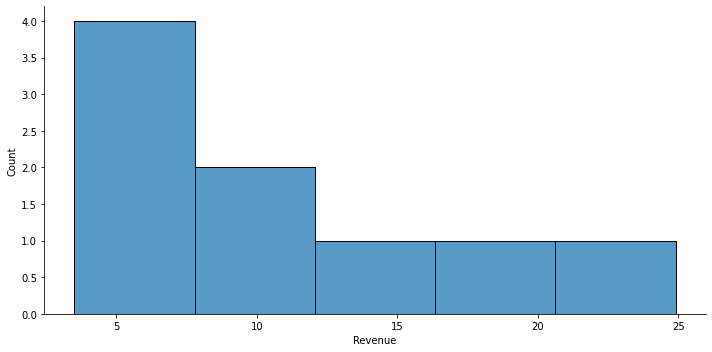

In [10]:
# developing a histogram using DISPLOT
sns.displot(data   = df_new1,
            x      = 'Revenue',
            height = 5,
            aspect = 2)


plt.show()

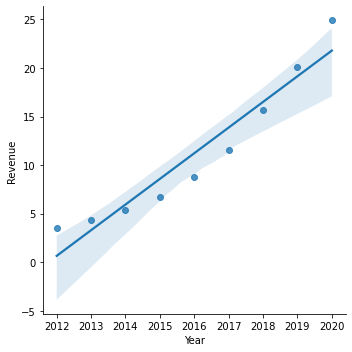

In [11]:
sns.lmplot(x='Year', y='Revenue', data=df_new1)

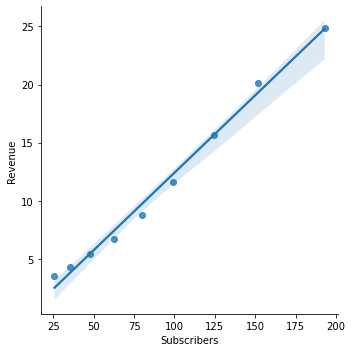

In [12]:
sns.lmplot(x='Subscribers', y='Revenue', data=df_new1)

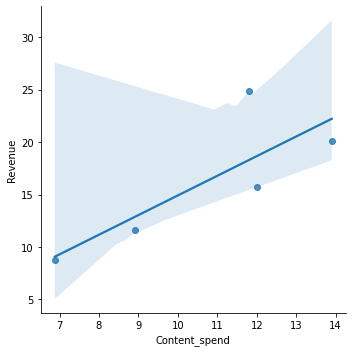

In [13]:
sns.lmplot(x='Content_spend', y='Revenue', data=df_new1)

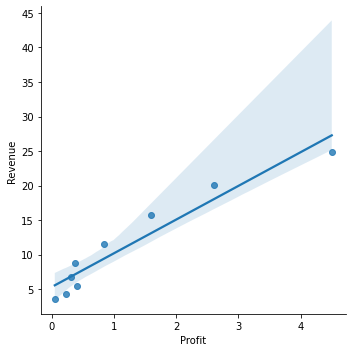

In [14]:
sns.lmplot(x='Profit', y='Revenue', data=df_new1)

# MISSING VALUE ANALYSIS AND IMPUTATION

In [15]:
df_new1.isnull()

,Year,Profit,Revenue,Subscribers,Content_spend
0,False,True,True,False,True
1,False,False,False,False,True
2,False,False,False,False,True
3,False,False,False,False,True
4,False,False,False,False,True
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [16]:
df_new1

,Year,Profit,Revenue,Subscribers,Content_spend
0,2011,NaN,NaN,21.5,NaN
1,2012,0.050,3.5,25.7,NaN
2,2013,0.228,4.3,35.6,NaN
3,2014,0.403,5.4,47.9,NaN
4,2015,0.306,6.7,62.7,NaN
5,2016,0.379,8.8,79.9,6.88
6,2017,0.839,11.6,99.0,8.91
7,2018,1.600,15.7,124.3,12.00
8,2019,2.600,20.1,151.5,13.90
9,2020,4.500,24.9,192.9,11.80


In [17]:
## Replace all NaN values with 0
#df_new2= df_new1.fillna(0)
#df_new2
df_new2=df_new1
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
print(imputer)
df_new2.Profit = imputer.fit_transform(df_new2['Profit'].values.reshape(-1,1))
df_new2.Revenue = imputer.fit_transform(df_new2['Revenue'].values.reshape(-1,1))
df_new2.Subscribers = imputer.fit_transform(df_new2['Subscribers'].values.reshape(-1,1))
df_new2.Content_spend = imputer.fit_transform(df_new2['Content_spend'].values.reshape(-1,1))
df_new2

SimpleImputer(strategy='median')


,Year,Profit,Revenue,Subscribers,Content_spend
0,2011,0.403,8.8,21.5,11.90
1,2012,0.050,3.5,25.7,11.90
2,2013,0.228,4.3,35.6,11.90
3,2014,0.403,5.4,47.9,11.90
4,2015,0.306,6.7,62.7,11.90
5,2016,0.379,8.8,79.9,6.88
6,2017,0.839,11.6,99.0,8.91
7,2018,1.600,15.7,124.3,12.00
8,2019,2.600,20.1,151.5,13.90
9,2020,4.500,24.9,192.9,11.80


# Understand the relationship between variables

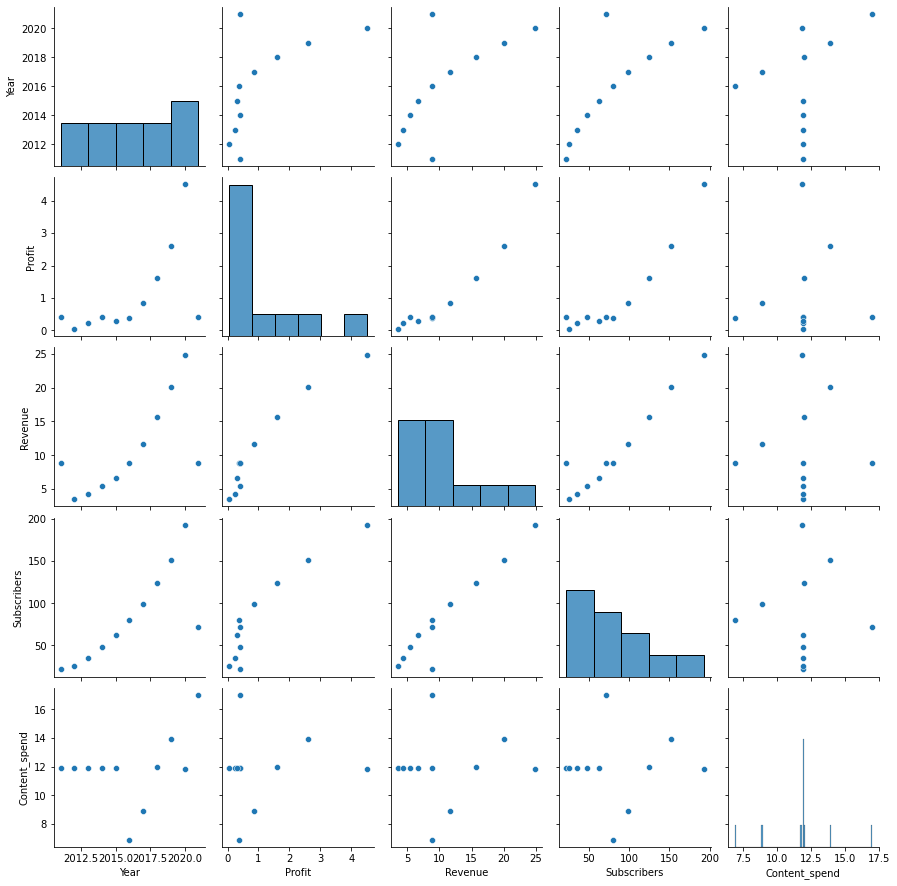

In [18]:
sns.pairplot(df_new2)

# OLS results interpretation

In [19]:
from sklearn import linear_model
import statsmodels.api as sm

x = df_new2[['Year','Subscribers','Profit','Content_spend']]
y = df_new2['Revenue']
 
# adding a constant as an intercept is not included by default and has to be added manually 
x = sm.add_constant(x) 
 
model = sm.OLS(y, x).fit()
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     29.37
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           0.000442
Time:                        22:31:32   Log-Likelihood:                -19.549
No. Observations:                  11   AIC:                             49.10
Df Residuals:                       6   BIC:                             51.09
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           513.1137   1205.304      0.426

C:\Users\vdp10002\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


# Linear Regression Model

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.metrics import r2_score

In [21]:
#split features: recognising dependent and independent variables
y=df_new2[['Revenue']]
print(y)
x=df_new2.drop(['Revenue'], axis=1)
print(x)

    Revenue
0       8.8
1       3.5
2       4.3
3       5.4
4       6.7
5       8.8
6      11.6
7      15.7
8      20.1
9      24.9
10      8.8
    Year  Profit  Subscribers  Content_spend
0   2011   0.403         21.5          11.90
1   2012   0.050         25.7          11.90
2   2013   0.228         35.6          11.90
3   2014   0.403         47.9          11.90
4   2015   0.306         62.7          11.90
5   2016   0.379         79.9           6.88
6   2017   0.839         99.0           8.91
7   2018   1.600        124.3          12.00
8   2019   2.600        151.5          13.90
9   2020   4.500        192.9          11.80
10  2021   0.403         71.3          17.00


In [22]:
#preparing training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape
print(x_train)

    Year  Profit  Subscribers  Content_spend
2   2013   0.228         35.6          11.90
3   2014   0.403         47.9          11.90
9   2020   4.500        192.9          11.80
0   2011   0.403         21.5          11.90
6   2017   0.839         99.0           8.91
8   2019   2.600        151.5          13.90
5   2016   0.379         79.9           6.88
10  2021   0.403         71.3          17.00


In [23]:
x_test

,Year,Profit,Subscribers,Content_spend
4,2015,0.306,62.7,11.9
7,2018,1.600,124.3,12.0
1,2012,0.050,25.7,11.9


In [24]:
y_test

,Revenue
4,6.7
7,15.7
1,3.5


In [25]:
y_train

,Revenue
2,4.3
3,5.4
9,24.9
0,8.8
6,11.6
8,20.1
5,8.8
10,8.8


In [26]:
%%time
#instantiating linear regression model and fitting it to the training data
LR = LinearRegression()
LR.fit(x_train,y_train)

CPU times: total: 0 ns
Wall time: 2 ms


LinearRegression()

In [27]:
print('Intercept (c): ', LR.intercept_)
print('Coefficient (m): ', LR.coef_)
#scoring the model based on training and testing data
LR_test_score=LR.score(x_test, y_test)
LR_train_score=LR.score(x_train, y_train)
print('LR Testing Score: ', LR_test_score)
print('LR Trainig Score: ', LR_train_score)

Intercept (c):  [887.60609464]
Coefficient (m):  [[-0.44146596  1.38906515  0.10234273  0.29715788]]
LR Testing Score:  0.9041527270851477
LR Trainig Score:  0.9524730521774123


In [28]:
#predicting on test data
y_predict = LR.predict(x_test)
print(y_predict)

[[ 8.43031193]
 [15.23739231]
 [ 5.61242811]]


In [29]:
#evaluating Linear Regression model
MSE_LR=mean_squared_error(y_test,y_predict)
RMSE_LR=np.sqrt(mean_squared_error(y_test,y_predict))
print("LR mean_sqrd_error is==", MSE_LR)
print("LR root_mean_squared error of is==",RMSE_LR)

LR mean_sqrd_error is== 2.5567792534886373
LR root_mean_squared error of is== 1.598993199950718


In [30]:
#evaluating feature YEAR
x_yr=df_new2[['Year']]
y_yr=df_new2[['Revenue']]
x_yr_train, x_yr_test, y_yr_train, y_yr_test = train_test_split(x_yr, y_yr, test_size=0.25)
print('Shape of X_Year_TrainingData:', x_yr_train.shape)
LR_yr = LinearRegression()
LR_yr.fit(x_yr_train,y_yr_train)
y_yr_predict = LR_yr.predict(x_yr_test)
print(y_yr_predict)
print('Test Score:',LR_yr.score(x_yr_test, y_yr_test))
print('Train Score:', LR_yr.score(x_yr_train, y_yr_train))
print('Linear Model Coefficient (m): ', LR_yr.coef_)
print('Linear Model Coefficient (b): ', LR_yr.intercept_)
MSE_LR_yr=mean_squared_error(y_yr_test,y_yr_predict)
print("mean_sqrd_error is==", MSE_LR_yr)

Shape of X_Year_TrainingData: (8, 1)
[[12.29598145]
 [ 5.56615147]
 [13.41761978]]
Test Score: 0.5909239486505122
Train Score: 0.34682159254801936
Linear Model Coefficient (m):  [[1.12163833]]
Linear Model Coefficient (b):  [-2251.17017002]
mean_sqrd_error is== 20.170176505205415


In [31]:
#evaluating feature CONTENT SPEND
x_cont=df_new2[['Content_spend']]
y_cont=df_new2[['Revenue']]
#print(x_sub)
#print(y_sub)
x_cont_train, x_cont_test, y_cont_train, y_cont_test = train_test_split(x_cont, y_cont, test_size=0.25)
#print('Shape of X_Subscribers_TrainingData:', x_sub_train.shape)
#print(x_sub_train)
LR_cont = LinearRegression()
LR_cont.fit(x_cont_train,y_cont_train)
y_cont_predict = LR_cont.predict(x_cont_test)
print(y_cont_predict)
print('Test Score:',LR_cont.score(x_cont_test, y_cont_test))
print('Train Score:', LR_cont.score(x_cont_train, y_cont_train))
print('Linear Model Coefficient (m): ', LR_cont.coef_)
print('Linear Model Coefficient (b): ', LR_cont.intercept_)
MSE_LR_cont=mean_squared_error(y_cont_test,y_cont_predict)
print("mean_sqrd_error is==", MSE_LR_cont)

[[11.33250145]
 [12.01163664]
 [10.89434971]]
Test Score: 0.014016633999728856
Train Score: 0.0037949537333521466
Linear Model Coefficient (m):  [[0.21907587]]
Linear Model Coefficient (b):  [8.28734688]
mean_sqrd_error is== 43.55636296159866


In [32]:
#evaluating feature PROFIT
x_prof=df_new2[['Profit']]
y_prof=df_new2[['Revenue']]
#print(x_sub)
#print(y_sub)
x_prof_train, x_prof_test, y_prof_train, y_prof_test = train_test_split(x_prof, y_prof, test_size=0.25)
#print('Shape of X_Subscribers_TrainingData:', x_sub_train.shape)
#print(x_sub_train)
LR_prof = LinearRegression()
LR_prof.fit(x_prof_train,y_prof_train)
y_prof_predict = LR_prof.predict(x_prof_test)
print(y_prof_predict)
print('Test Score:',LR_prof.score(x_prof_test, y_prof_test))
print('Train Score:', LR_prof.score(x_prof_train, y_prof_train))
print('Linear Model Coefficient (m): ', LR_prof.coef_)
print('Linear Model Coefficient (b): ', LR_prof.intercept_)
MSE_LR_prof=mean_squared_error(y_prof_test,y_prof_predict)
print("mean_sqrd_error is==", MSE_LR_prof)

[[7.53681973]
 [7.65074992]
 [6.82000896]]
Test Score: 0.31356701329992187
Train Score: 0.9229748831552983
Linear Model Coefficient (m):  [[4.74709117]]
Linear Model Coefficient (b):  [5.73767217]
mean_sqrd_error is== 3.0889484401503524


In [33]:
#evaluating feature SUBSCRIBER
x_sub=df_new2[['Subscribers']]
y_sub=df_new2[['Revenue']]
#print(x_sub)
#print(y_sub)
x_sub_train, x_sub_test, y_sub_train, y_sub_test = train_test_split(x_sub, y_sub, test_size=0.25)
#print('Shape of X_Subscribers_TrainingData:', x_sub_train.shape)
#print(x_sub_train)
LR_sub = LinearRegression()
LR_sub.fit(x_sub_train,y_sub_train)
y_sub_predict = LR_sub.predict(x_sub_test)
print(y_sub_predict)
print('Test Score:',LR_sub.score(x_sub_test, y_sub_test))
print('Train Score:', LR_sub.score(x_sub_train, y_sub_train))
print('Linear Model Coefficient (m): ', LR_sub.coef_)
print('Linear Model Coefficient (b): ', LR_sub.intercept_)
MSE_LR_sub=mean_squared_error(y_sub_test,y_sub_predict)
print("mean_sqrd_error is==", MSE_LR_sub)

[[7.39251431]
 [6.00928999]
 [9.05688178]]
Test Score: -3.31178195960747
Train Score: 0.9057944001433338
Linear Model Coefficient (m):  [[0.11245726]]
Linear Model Coefficient (b):  [2.00581147]
mean_sqrd_error is== 4.148892418911189


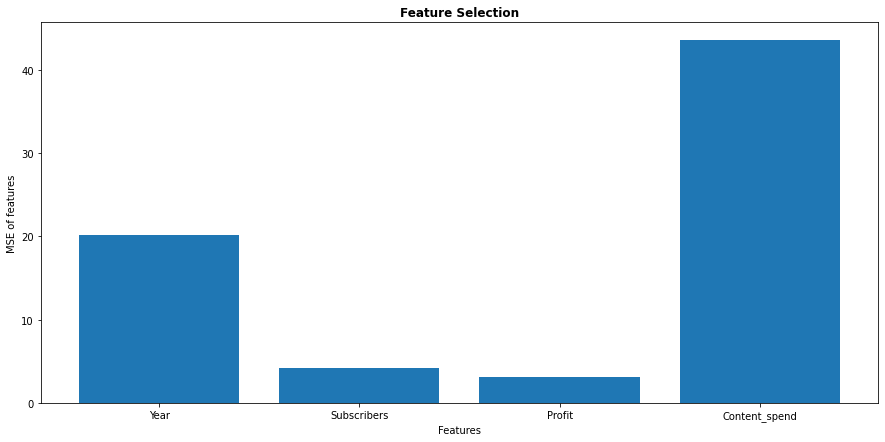

In [34]:
plt.bar(["Year", "Subscribers","Profit","Content_spend"],[MSE_LR_yr,MSE_LR_sub,MSE_LR_prof,MSE_LR_cont])
plt.title("Feature Selection", fontweight='bold')
plt.ylabel("MSE of features")
plt.xlabel("Features")
plt.show()

In [35]:
# predict revenue with #ofSubscribers
y_predict_1 = LR_sub.predict([[200]])
y_predict_1

C:\Users\vdp10002\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[24.49726383]])

In [36]:
# predict revenue for a particular year
y_predict_2 = LR_yr.predict([[2030]])
print(y_predict_2)

[[25.75564142]]


C:\Users\vdp10002\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Random Forest Regression Model

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
%%time
#instantiating Random Forest regression model and fitting it to the training data
RF = RandomForestRegressor(n_jobs=-1) 
RF.fit(x_sub_train, y_sub_train)

CPU times: total: 109 ms
Wall time: 85 ms


<timed exec>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestRegressor(n_jobs=-1)

In [39]:
# Calculate R2
RF_train_score=RF.score(x_sub_train, y_sub_train)
RF_test_score=RF.score(x_sub_test, y_sub_test)
print('RF Testing Score:',RF_test_score)
print('RF Taining Score:',RF_train_score)

RF Testing Score: -0.8282682448036791
RF Taining Score: 0.968001770168733


In [40]:
#predicting on test data
y_predict_RF = RF.predict(x_sub_test)
print(y_predict_RF)

[5.514 5.514 8.647]


In [41]:
#evaluating Random Forest regression model
score_RF=RF.score(y_sub_test,y_predict_RF)
MSE_RF=mean_squared_error(y_sub_test,y_predict_RF)
RMSE_RF=np.sqrt(mean_squared_error(y_sub_test,y_predict_RF))
print("RF r2 socre is ",score_RF)
print("RF mean_sqrd_error is==", MSE_RF)
print("RF root_mean_squared error of is==",RMSE_RF)

RF r2 socre is  -0.6401499171377567
RF mean_sqrd_error is== 1.7592003333333206
RF root_mean_squared error of is== 1.3263484961854184


C:\Users\vdp10002\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Revenue
Feature names seen at fit time, yet now missing:
- Subscribers

  warnings.warn(message, FutureWarning)


# KNN Regression Model

In [42]:
from sklearn.neighbors import KNeighborsRegressor 

In [43]:
%%time
#instantiating KNN regression model and fitting it to the training data
KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_sub_train,y_sub_train)

CPU times: total: 0 ns
Wall time: 2 ms


KNeighborsRegressor(n_neighbors=2)

In [44]:
KNN_test_score=KNN.score(x_sub_test, y_sub_test)
KNN_train_score=KNN.score(x_sub_train, y_sub_train)
print('KNN Testing Score:',KNN_test_score)
print('KNN Taining Score:',KNN_train_score)

KNN Testing Score: -1.9081986143187066
KNN Taining Score: 0.9104524248986294


In [45]:
y_predict_knn = KNN.predict(x_sub_test)
print(y_predict_knn)

[[6.15]
 [6.15]
 [8.8 ]]


In [47]:
score_KNN=KNN.score(y_sub_test,y_predict_RF)
MSE_KNN=mean_squared_error(y_sub_test,y_predict_knn)
RMSE_KNN=np.sqrt(mean_squared_error(y_sub_test,y_predict_knn))
print("r2 socre is ",score_KNN)
print("MSE is ",MSE_KNN)
print("RMSE is ",RMSE_KNN)

r2 socre is  -0.07644012559892577
MSE is  2.7983333333333342
RMSE is  1.6728219670166142


C:\Users\vdp10002\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Revenue
Feature names seen at fit time, yet now missing:
- Subscribers

  warnings.warn(message, FutureWarning)


# Decision Tree Regression Model

In [48]:
from sklearn.tree import DecisionTreeRegressor 

In [49]:
%%time
#instantiating Decision Tree regression model and fitting it to the training data
DT = DecisionTreeRegressor(random_state = 0)
DT.fit(x_sub_train,y_sub_train)

CPU times: total: 0 ns
Wall time: 4.04 ms


DecisionTreeRegressor(random_state=0)

In [50]:
DT_test_score=DT.score(x_sub_test, y_sub_test)
DT_train_score=DT.score(x_sub_train, y_sub_train)
print('DT Testing Score:',DT_test_score)
print('DT Taining Score:',DT_train_score)

DT Testing Score: -2.0000000000000004
DT Taining Score: 1.0


In [51]:
y_predict_DT = DT.predict(x_sub_test)
print(y_predict_DT)

[3.5 3.5 8.8]


In [52]:
score_DT=DT.score(y_sub_test,y_predict_knn)
MSE_DT=mean_squared_error(y_sub_test,y_predict_DT)
RMSE_DT=np.sqrt(mean_squared_error(y_sub_test,y_predict_DT))
print("r2 socre is ",score_DT)
print("MSE is ",MSE_DT)
print("RMSE is ",RMSE_DT)

r2 socre is  -1.9999999999999996
MSE is  2.886666666666668
RMSE is  1.6990193249832881


C:\Users\vdp10002\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Revenue
Feature names seen at fit time, yet now missing:
- Subscribers

  warnings.warn(message, FutureWarning)


# Comparing Models

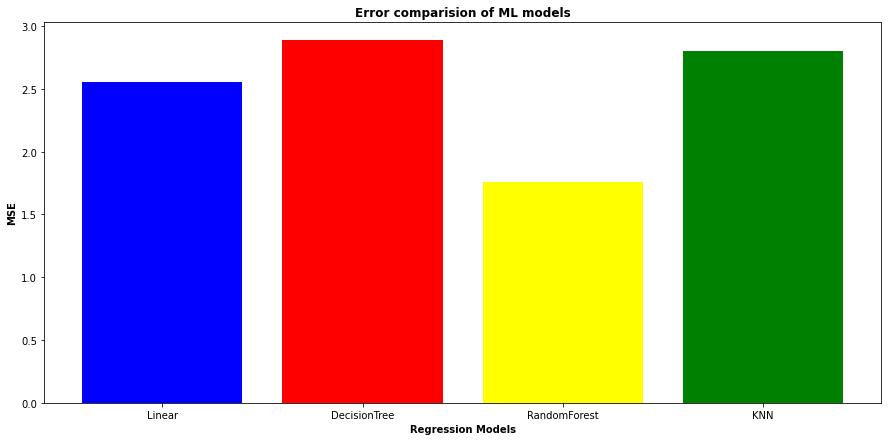

In [53]:
plt.bar(["Linear", "DecisionTree","RandomForest","KNN"],[MSE_LR,MSE_DT,MSE_RF,MSE_KNN], color=['blue', 'red', 'yellow', 'green'])
plt.title("Error comparision of ML models", fontweight="bold")
plt.ylabel("MSE", fontweight="bold")
plt.xlabel("Regression Models", fontweight="bold")
plt.show()